<a href="https://colab.research.google.com/github/SangMin316/DL-with-PyTorch/blob/main/DL_with_PyTorch3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.4 logistic regression

load data

In [1]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
print("Image Data Shape" , digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


data example

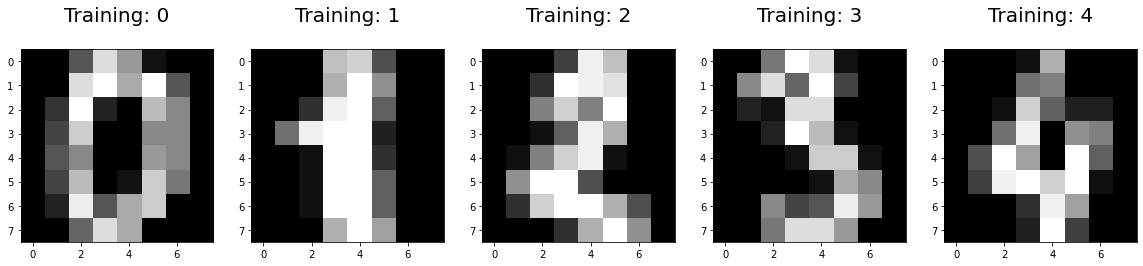

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

slpit data

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)



model

In [7]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

score

In [9]:
# 첫 10개에 대한 모델의 예측값 보기
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [10]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


Plot confusion matrix

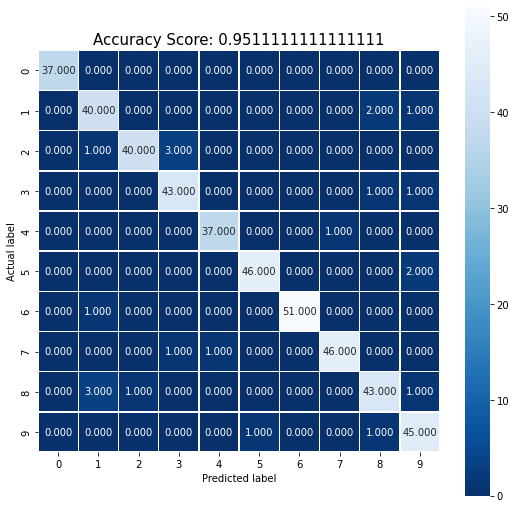

In [11]:
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show();

## 3.5 linear regression

import module

In [12]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

load data

In [13]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # 데이터 불러오기
dataset = pd.read_csv('weather.csv')

Saving weather.csv to weather.csv


Min temperatur로 mas temperature 예측하기

먼저 데이터 양상을 살펴봅시다.

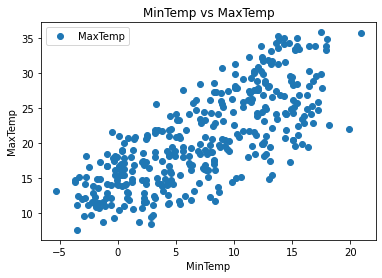

In [14]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp') 
plt.show()

data split, train model

In [15]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

model predict

In [16]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


,Actual,Predicted
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151


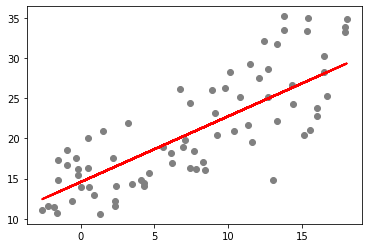

In [18]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

score

In [19]:
print('MS:', metrics.mean_squared_error(y_test, y_pred))  
print('RMS:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MS: 17.011877668640622
RMS: 4.124545753006096


## 3.6 k-means clustering

import library

In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

load data

In [21]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # 데이터 불러오기
data = pd.read_csv('sales data.csv')
data.head()

Saving sales data.csv to sales data.csv


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


preprocessing

In [22]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

 # pd.get_dummies를 이용하여 범주형 데이터는 0,1로 바꿔줌
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col) 
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [23]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

k값 바꾸면서 SSD(Sum of Squared Distance)를 그려봅니다.

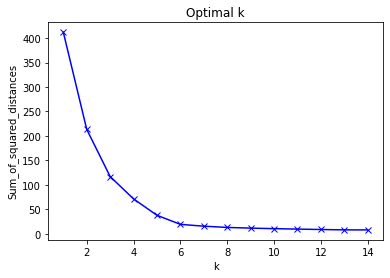

In [24]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()

어떤 데이터라도 k가 늘어날수록 SSD는 0에 수렴,

SSD가 충분히 낮은 것중에서, k값이 적은 것 선택, k = 5선택

## 3.7 Density-Based Spatial Clustering of Application with Noise.(DBSCAN)

일정 밀도 이상을 거진 데이터를 기준으로 군집을 형성하는 방법.

노이즈에 영향을 받지 않으며, k-means clustering이 잘 처리하지 모샇는 오목하거나 볼록한 부분을 처리하는데 유용.

1. 엡실론 내 점 개수 학인 및 중심점 결정

점 P1에서 거리 엡실론 내에 점이 m 개 이상있으면 하나의 군집으로 봄.


2.군집 확장

1에서 얻은 군집중 중심점을 만족하는 또 다른 데이터가 있다면 그 지역을 포함하여 새로운 군집 형성.

이 두 군집을 하나의 군집으로 확대.

3. 1~2반복

데이터가 밀집된 밀도가 높은 지역에서 더이상 중심점을 정의할 수 없을 때까지 1~2 반복

##3.8 Principle Component Analysis

고차원 data를 저차원 데이터로 축소시키는 방법

import library

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
  
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA

load data

In [26]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # 데이터 불러오기
X = pd.read_csv('credit card.csv') 

Saving credit card.csv to credit card.csv


In [27]:
X.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


preprocessing

In [28]:
X = X.drop('CUST_ID', axis = 1) 
X.fillna(method ='ffill', inplace = True) # 결측값을 앞의 값으로 채울때 method = 'ffill'
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Scaler, normalize

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled) 
X_normalized = pd.DataFrame(X_normalized)


PCA

In [30]:
pca = PCA(n_components = 2) #2차원으로 축소
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head()

,P1,P2
0,-0.489949,-0.679975
1,-0.519098,0.544831
2,0.330633,0.268880
3,-0.481656,-0.097606
4,-0.563512,-0.482506


PCA된 data로 DBSCAN모델 생성, 결과 시각화

In [31]:
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal) # 모델 생성
labels = db_default.labels_ #각 데이터 포인트에 할당된 모든 클러스터 레이블의 넘파이 배열을 labels에 저장


시각화

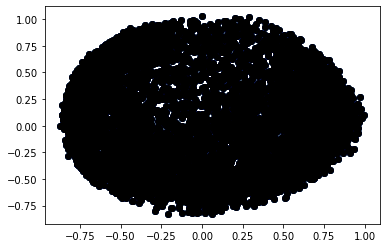

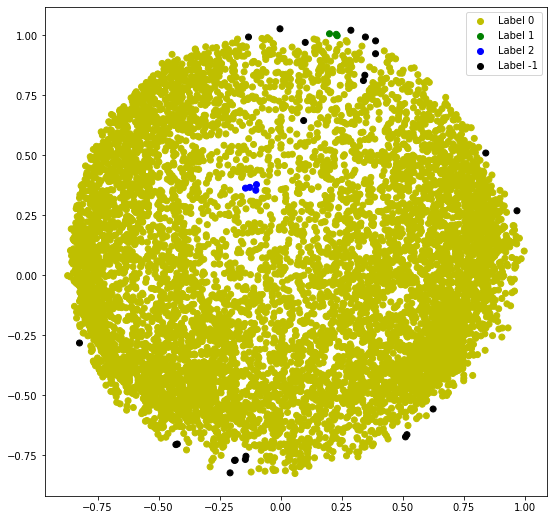

In [36]:
colours = {}  # 출력그래프의 색상을 위한 레이블 생성
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
cvec = [colours[label] for label in labels]  # 각 포인트에 대한 색상 백터 생성
  
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)  #정의된 색상 백터에 따라 X축에 P1, y축에 P2 plotting
  
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))  # 범례
plt.show()

min_samples = 50으로 바꿔서 다시 진행.

In [37]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal) 
labels1 = db.labels_

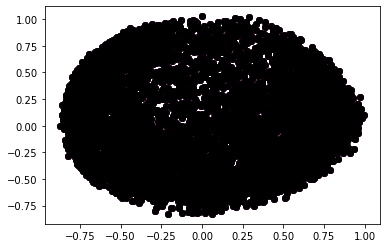

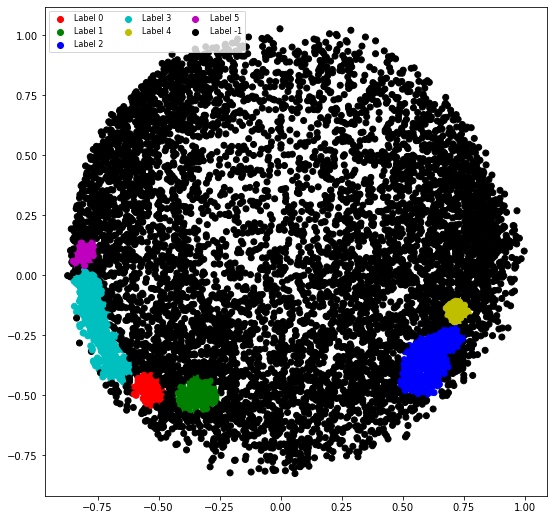

In [38]:
colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[0]) 
g = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[1]) 
b = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[2]) 
c = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[3]) 
y = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[4]) 
m = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[5]) 
k = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show()

군집이 더 잘 표현되었음을 확인할 수 있습니다.